In [15]:
TOPN=30
CATEGORY_COLUMN = "category"
meta_dir = "data/posts/ajtkulov/meta"
selected_dir = "data/posts/ajtkulov/selected"
channels_file_name = "all_channels_clean_with_cols.csv"
selected_posts_file_name = "selected_posts_with_category.jsonl"
selected10k_posts_file_name = 'selected10k.jsonl'

Загружаем файл каналов...
Всего каналов: 380,468
Столбцы в файле: ['link', 'name', 'description', 'category', 'message_id ']

Топ-30 категорий по количеству каналов:
category
Новости                   25909
Блоги                     25599
Другое                    20693
Мода и красота            17673
Психология                13740
Картинки и фото           13147
Юмор и развлечение        12609
Образование               12402
Бизнес                    12381
Telegram                  12091
Продажи                   11220
Музыка                    10343
Цитаты                     9421
Криптовалюты               8994
Путешествия                8283
Искусство                  8269
Спорт                      8128
Для взрослых               7910
Позновательное             7894
Политика                   7880
Эзотерика                  7496
Технологии                 7264
Еда и кулинария            6804
Видео и фильмы             6629
Здоровье и фитнес          6621
Маркетинг, PR, реклама   

C:\Users\Admin\AppData\Local\Temp\ipykernel_14408\2045320184.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20.values, y=top20.index, palette="viridis")


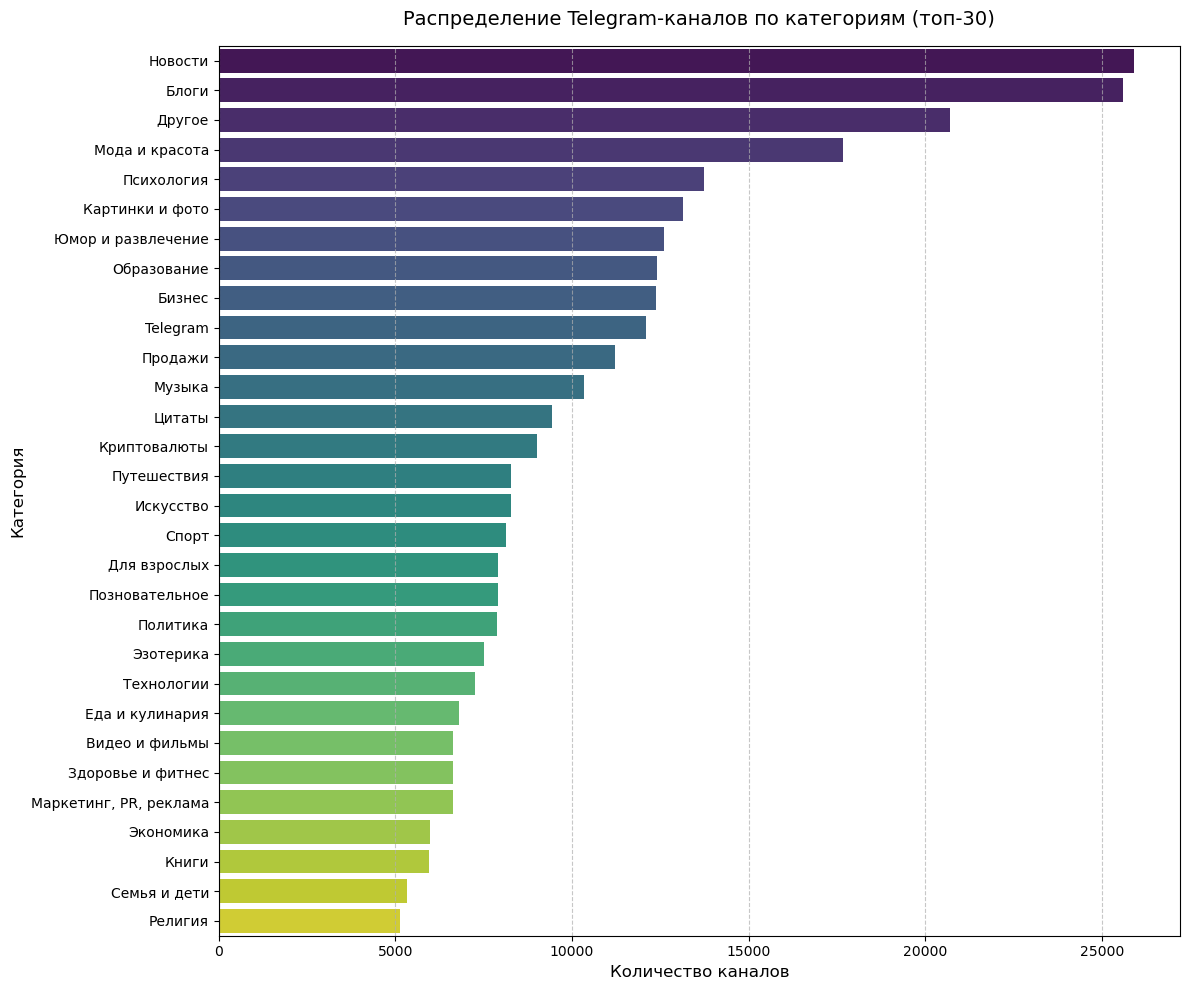

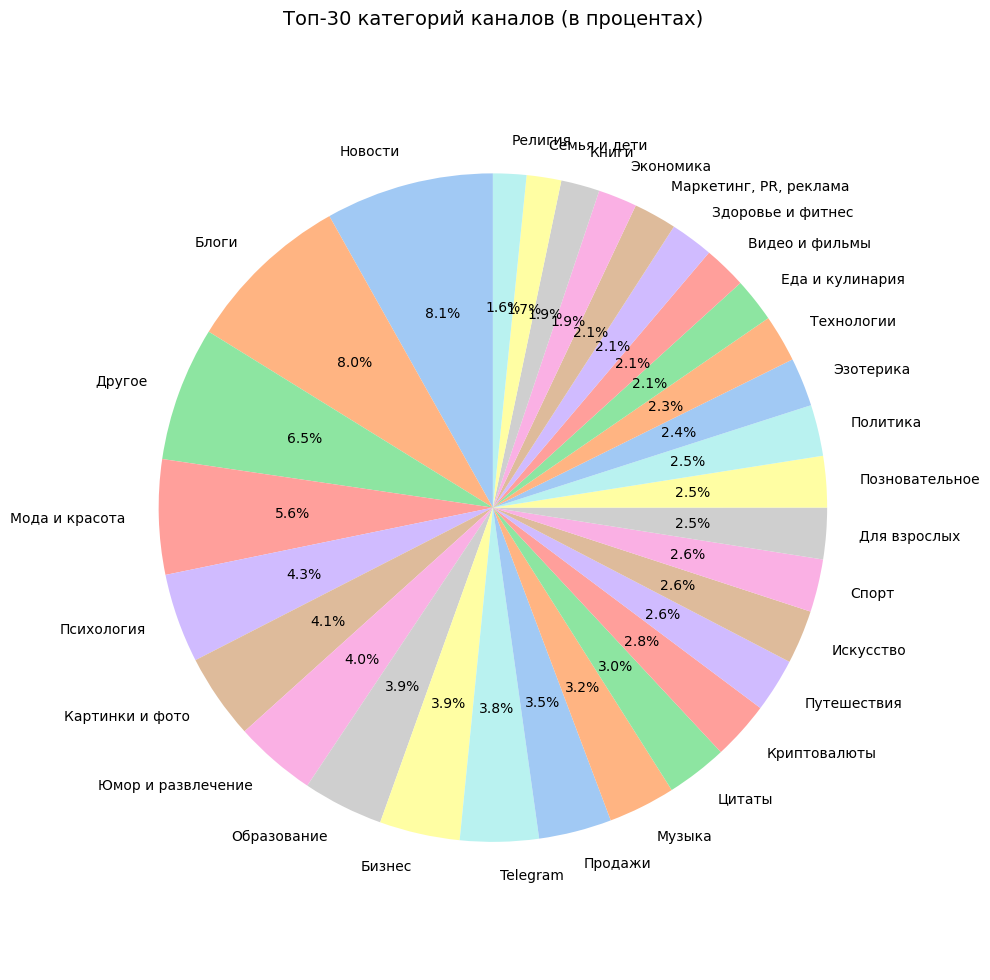

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==================== НАСТРОЙКИ ====================
channels_file = os.path.join(meta_dir, channels_file_name)


# ==================== ЗАГРУЗКА ====================
print("Загружаем файл каналов...")
if not os.path.exists(channels_file):
    print(f"Ошибка: файл не найден → {channels_file}")
    print("Проверьте путь и имя файла в папке meta/")
else:
    df = pd.read_csv(channels_file)
    print(f"Всего каналов: {len(df):,}")
    print("Столбцы в файле:", df.columns.tolist())
    
    if CATEGORY_COLUMN not in df.columns:
        print(f"\nВнимание! Столбца '{CATEGORY_COLUMN}' нет.")
        print("Возможные кандидаты:", [c for c in df.columns if 'cat' in c.lower() or 'subj' in c.lower()])
    else:
        # Очистка: убираем NaN и приводим к строкам
        df[CATEGORY_COLUMN] = df[CATEGORY_COLUMN].fillna("Без категории").astype(str)
        
        # Подсчёт распределения
        category_counts = df[CATEGORY_COLUMN].value_counts()
        print("\nТоп-30 категорий по количеству каналов:")
        print(category_counts.head(TOPN))
        
        # График 1: Горизонтальный барплот (топ-20)
        plt.figure(figsize=(12, 10))
        top20 = category_counts.head(TOPN)
        sns.barplot(x=top20.values, y=top20.index, palette="viridis")
        plt.title("Распределение Telegram-каналов по категориям (топ-30)", fontsize=14, pad=15)
        plt.xlabel("Количество каналов", fontsize=12)
        plt.ylabel("Категория", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # График 2: Круговая диаграмма (топ-10)
        plt.figure(figsize=(10, 10))
        topn = category_counts.head(TOPN)
        plt.pie(topn.values, labels=topn.index, autopct='%1.1f%%', startangle=90, 
                colors=sns.color_palette("pastel", len(topn)))
        plt.title("Топ-30 категорий каналов (в процентах)", fontsize=14, pad=15)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [18]:
def plot_category_distribution(
    file_path: str,
    category_column: str = "category",
    top_n: int = TOPN,
    title_prefix: str = "Telegram-постов"
):
    """
    Строит графики распределения категорий для указанного JSONL-файла.
    
    Параметры:
    - file_path: путь к .jsonl файлу с постами
    - category_column: имя столбца с категориями (по умолчанию "category")
    - top_n: сколько категорий показывать в топе (по умолчанию 20)
    - title_prefix: префикс в заголовке графиков (например "Telegram-постов" или "каналов")
    """
    path = os.path.join(selected_dir, file_path)
    file_path = path
    if not os.path.exists(file_path):
        print(f"Ошибка: файл не найден → {file_path}")
        return
    
    print(f"\nОбработка файла: {file_path}")
    df = pd.read_json(file_path, lines=True)
    print(f"Всего записей: {len(df):,}")
    print("Столбцы:", df.columns.tolist())
    
    if category_column not in df.columns:
        print(f"\nВнимание! Столбца '{category_column}' нет.")
        print("Возможные кандидаты:", [c for c in df.columns if 'cat' in c.lower() or 'subj' in c.lower()])
        return
    
    # Очистка
    df[category_column] = df[category_column].fillna("Без категории").astype(str)
    
    # Подсчёт
    category_counts = df[category_column].value_counts()
    print(f"\nТоп-{top_n} категорий по количеству:")
    print(category_counts.head(top_n))
    
    # График 1: Горизонтальный барплот
    plt.figure(figsize=(12, 10))
    top_data = category_counts.head(top_n)
    sns.barplot(x=top_data.values, y=top_data.index, palette="viridis")
    plt.title(f"Распределение {title_prefix} по категориям (топ-{top_n})", fontsize=14, pad=15)
    plt.xlabel("Количество", fontsize=12)
    plt.ylabel("Категория", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # График 2: Круговая диаграмма
    plt.figure(figsize=(10, 10))
    top_data_pie = category_counts.head(top_n)
    plt.pie(top_data_pie.values, labels=top_data_pie.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette("pastel", len(top_data_pie)))
    plt.title(f"Топ-{top_n} категорий {title_prefix} (в процентах)", fontsize=14, pad=15)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


Обработка файла: data/posts/ajtkulov/selected\selected_posts_with_category.jsonl
Всего записей: 700,000
Столбцы: ['channel', 'text', 'link', 'id', 'date', 'views', 'category']

Топ-30 категорий по количеству:
category
Блоги                       125923
Криптовалюты                 47220
Игры                         46386
Мода и красота               43054
Юмор и развлечение           28034
Экономика                    26413
Продажи                      26245
Технологии                   25817
Психология                   24307
Еда и кулинария              20208
Позновательное               19003
Бизнес                       16644
Видео и фильмы               16567
Путешествия                  16402
Спорт                        16349
Здоровье и фитнес            16349
Музыка                       14252
Эзотерика                    14040
Букмекерство                 13327
Карьера                      13124
Цитаты                       11832
Транспорт                    11048
Семья и дет

C:\Users\Admin\AppData\Local\Temp\ipykernel_14408\1847232047.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.values, y=top_data.index, palette="viridis")


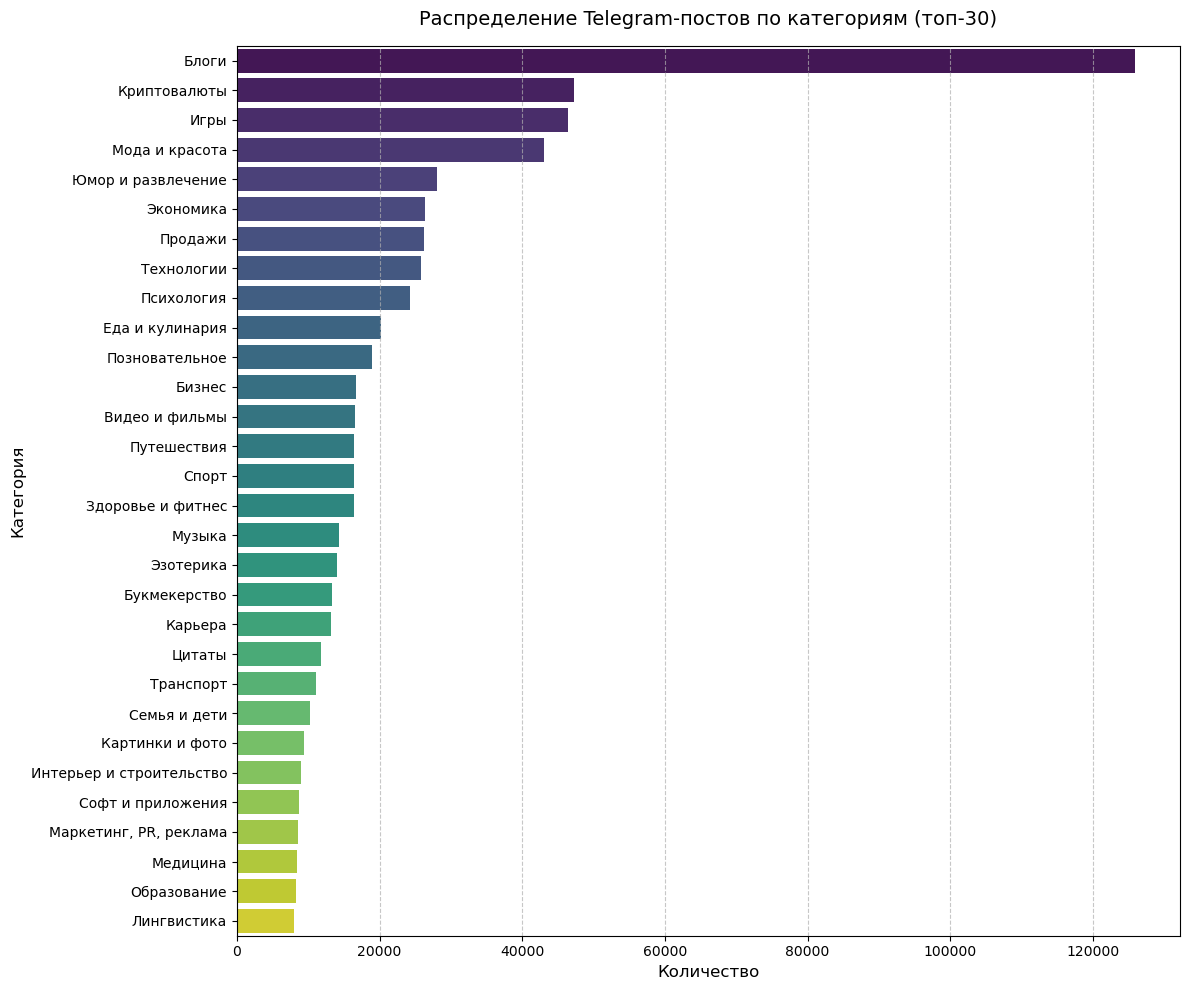

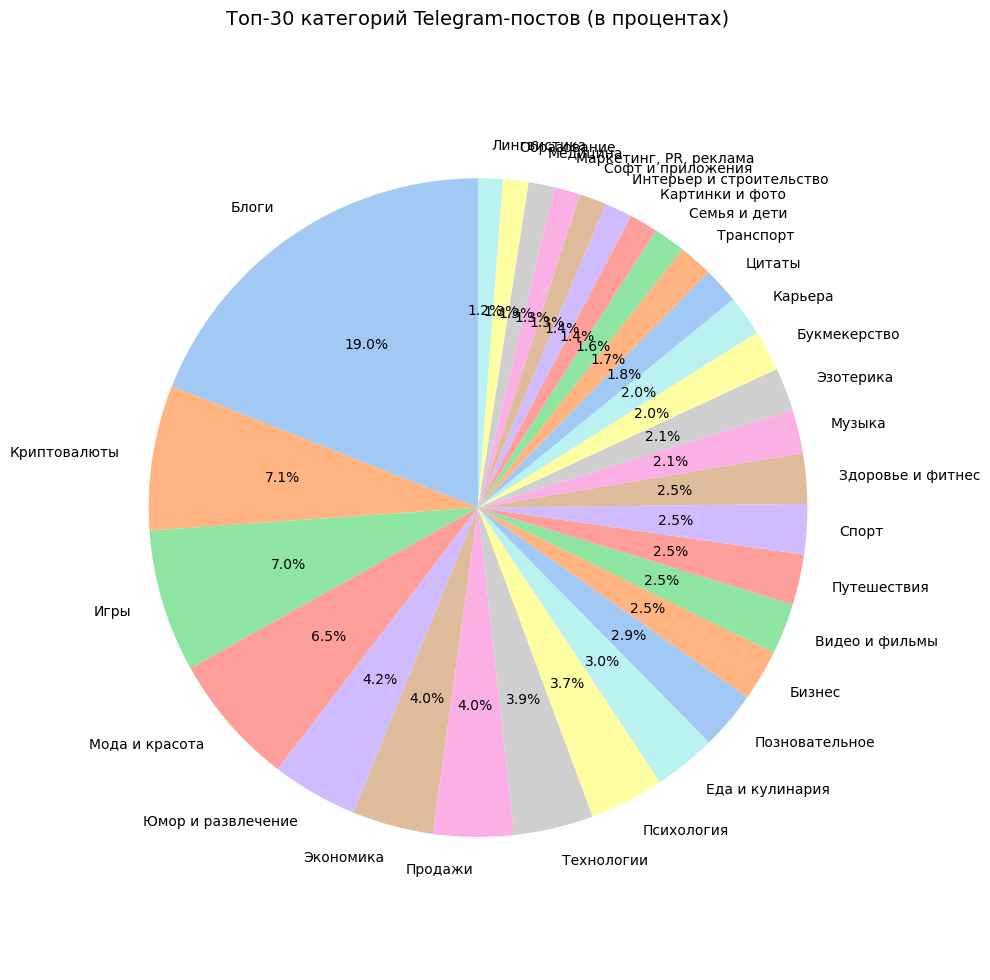

In [19]:
plot_category_distribution(
    file_path=selected_posts_file_name,
    category_column="category",
    top_n=TOPN,
    title_prefix="Telegram-постов"
)

In [ ]:
import pandas as pd
import os
from scipy.stats import entropy  # для KL-divergence
import numpy as np

# ==================== НАСТРОЙКИ ====================


channels_file = os.path.join(meta_dir, channels_file_name)
posts_file = os.path.join(selected_dir, selected_posts_file_name)


# ==================== ЗАГРУЗКА ====================
print("Загружаем файлы...")
channels_df = pd.read_csv(channels_file)
posts_df = pd.read_json(posts_file, lines=True)

print(f"Каналов в основном датасете: {len(channels_df):,}")
print(f"Постов в выборке: {len(posts_df):,} ")

# ==================== РАСПРЕДЕЛЕНИЯ ====================
# Очистка
channels_df[CATEGORY_COLUMN] = channels_df[CATEGORY_COLUMN].fillna("Без категории").astype(str)
posts_df[CATEGORY_COLUMN] = posts_df[CATEGORY_COLUMN].fillna("Без категории").astype(str)

# Подсчёт counts
channels_counts = channels_df[CATEGORY_COLUMN].value_counts()
posts_counts = posts_df[CATEGORY_COLUMN].value_counts()

# Все уникальные категории (объединение из обоих)
all_categories = sorted(set(channels_counts.index) | set(posts_counts.index))

# Нормализованные проценты (для сравнения)
channels_percent = (channels_counts / channels_counts.sum() * 100).reindex(all_categories, fill_value=0)
posts_percent = (posts_counts / posts_counts.sum() * 100).reindex(all_categories, fill_value=0)

# Разница в процентах (posts % - channels %)
difference = posts_percent - channels_percent

# ==================== ТАБЛИЦА СРАВНЕНИЯ ====================
comparison_df = pd.DataFrame({
    "Category": all_categories,
    "Channels Count": channels_counts.reindex(all_categories, fill_value=0),
    "Channels %": channels_percent.round(2),
    "Posts Count": posts_counts.reindex(all_categories, fill_value=0),
    "Posts %": posts_percent.round(2),
    "Difference (%)": difference.round(2)
})

# Сортировка по разнице (абсолютной, для интересных отклонений)
comparison_df = comparison_df.sort_values(by="Difference (%)", key=abs, ascending=False)

print("\nСравнение распределений по всем категориям (сортировка по |Difference|):")
print(comparison_df.to_string(index=False))  # весь вывод в консоль

# Сохранение в CSV для анализа
comparison_csv = os.path.join(selected_dir, "categories_comparison.csv")
comparison_df.to_csv(comparison_csv, index=False, encoding='utf-8-sig')
print(f"\nТаблица сохранена: {comparison_csv}")

# ==================== АЛГОРИТМ ДЛЯ ВЫВОДА ====================
# 1. KL-Divergence (метрика расхождения распределений, >0 = различия)
# Нормализуем на вероятности (0..1)
channels_prob = channels_counts / channels_counts.sum()
posts_prob = posts_counts / posts_counts.sum()

# Выравниваем индексы
common_index = channels_prob.index.intersection(posts_prob.index)
channels_prob = channels_prob.reindex(common_index, fill_value=1e-10)  # избегать 0
posts_prob = posts_prob.reindex(common_index, fill_value=1e-10)

kl_div = entropy(posts_prob, channels_prob)  # KL(P_posts || P_channels)

# 2. Топ отклонений
over_represented = comparison_df[comparison_df["Difference (%)"] > 0].head(5)
under_represented = comparison_df[comparison_df["Difference (%)"] < 0].head(5).sort_values(by="Difference (%)")

print("\nАнализ распределений (алгоритм: KL-Divergence + топ отклонений):")
print(f"KL-Divergence (расхождение): {kl_div:.4f}")
print("  - <0.05: распределения очень похожи")
print("  - 0.05–0.2: умеренные различия")
print("  - >0.2: значительные расхождения")

if kl_div < 0.05:
    print("Вывод: Распределение в выборке (700k постов по 5 на канал) очень близко к исходному датасету каналов — равномерное и сбалансированное.")
elif kl_div < 0.2:
    print("Вывод: Умеренные различия — выборка в целом равномерна, но некоторые категории немного пере- или недопредставлены (см. топ отклонений).")
else:
    print("Вывод: Значительные расхождения — выборка не равномерна относительно исходного датасета. Рекомендуется проверить стратегию отбора (mid_range) или добавить балансировку.")

print("\nТоп-5 перепредставленных категорий в выборке (Difference >0):")
print(over_represented[["Category", "Posts %", "Channels %", "Difference (%)"]].to_string(index=False))

print("\nТоп-5 недопредставленных категорий в выборке (Difference <0):")
print(under_represented[["Category", "Posts %", "Channels %", "Difference (%)"]].to_string(index=False))


Обработка файла: data/posts/ajtkulov/selected\selected10k.jsonl
Всего записей: 10,029
Столбцы: ['channel', 'text', 'link', 'id', 'date', 'views', 'category']

Топ-30 категорий по количеству:
category
Блоги                       1799
Криптовалюты                 675
Игры                         663
Мода и красота               615
Юмор и развлечение           400
Экономика                    377
Продажи                      375
Технологии                   369
Психология                   347
Еда и кулинария              289
Позновательное               271
Бизнес                       238
Видео и фильмы               237
Спорт                        234
Здоровье и фитнес            234
Путешествия                  234
Музыка                       204
Эзотерика                    201
Букмекерство                 190
Карьера                      187
Цитаты                       169
Транспорт                    158
Семья и дети                 147
Картинки и фото              134
Интерье

C:\Users\Admin\AppData\Local\Temp\ipykernel_14408\1847232047.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.values, y=top_data.index, palette="viridis")


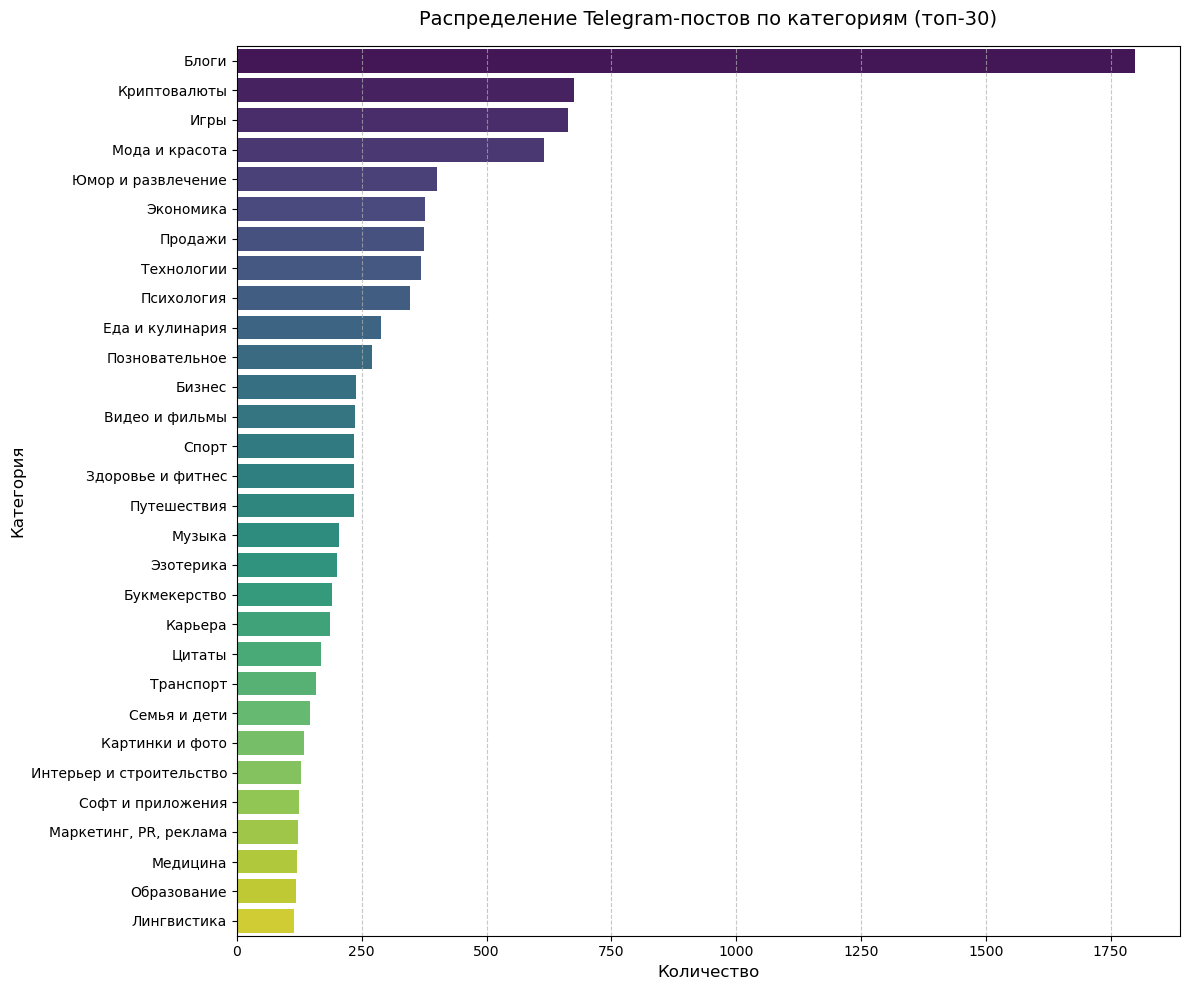

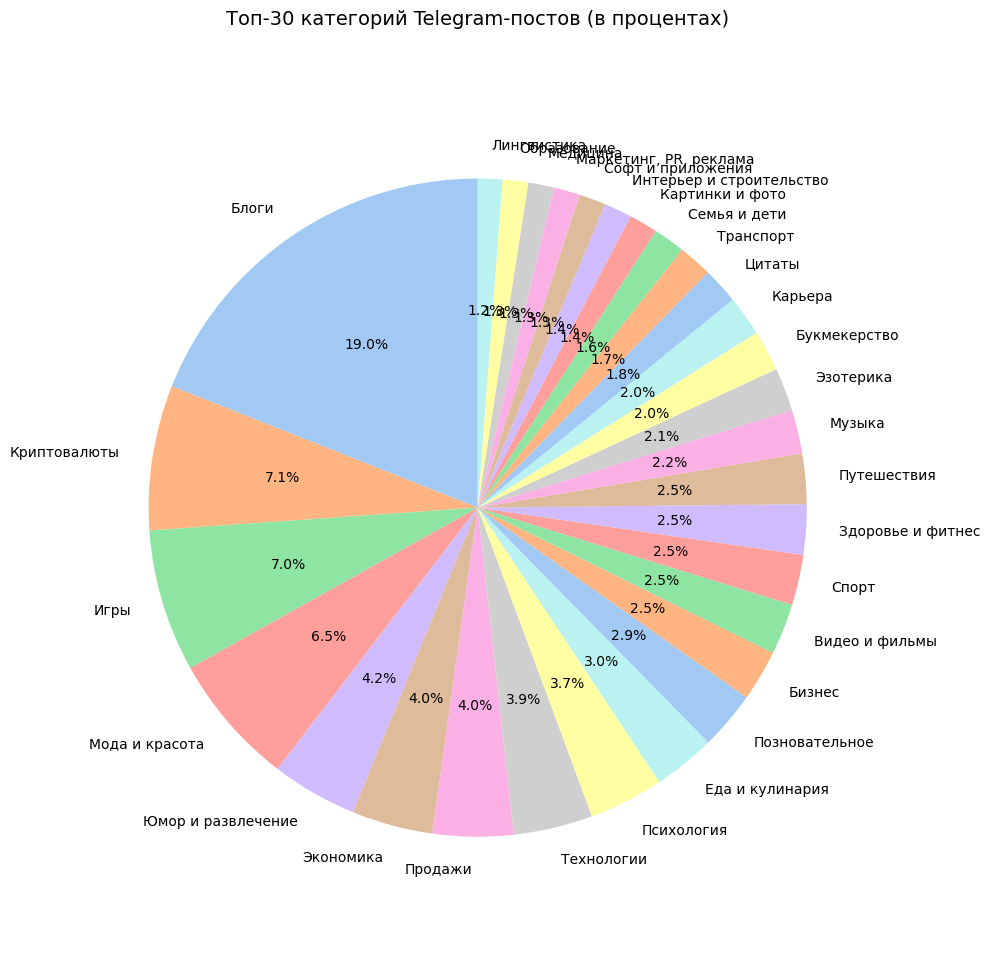

In [20]:
plot_category_distribution(
    file_path=selected10k_posts_file_name,
    category_column="category",
    top_n=TOPN,
    title_prefix="Telegram-постов"
)